<a href="https://colab.research.google.com/github/worejeongglenogang/2025-1-myclass-BDA/blob/main/inclass/07w_easy_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

#07 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기

##07-1 빠진 데이터를 찾아라! - 결측치 정제하기

####결측치 만들기

In [119]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [120]:
df['score'] + 1


,score
0,6.0
1,5.0
2,4.0
3,5.0
4,NaN


In [121]:
pd.isna(df)  # 결측치 확인


,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [122]:
pd.isnull(df)  # 결측치 확인


,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [123]:
pd.isna(df).sum()  # 결측치 빈도 확인


,0
sex,1
score,1


In [124]:
pd.isna(df).sum(axis=1)  # 결측치 빈도 확인


,0
0,0
1,0
2,1
3,0
4,1


In [125]:
s = pd.Series([True, False, True])
s

,0
0,True
1,False
2,True


In [126]:
s.sum()


np.int64(2)

In [127]:
s.any()


np.True_

In [128]:
df.isnull().any()


,0
sex,True
score,True


In [129]:
df.isna().any()


,0
sex,True
score,True


In [130]:
df.notnull()


,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [131]:
df.notnull().all()


,0
sex,False
score,False


In [132]:
df.notna().any()


,0
sex,True
score,True


In [133]:
df.notna().all()


,0
sex,False
score,False


In [134]:
df.isna().all()


,0
sex,False
score,False


In [135]:
df.isna().any(axis=1)


,0
0,False
1,False
2,True
3,False
4,True


In [136]:
~df.isna().any(axis=1)


,0
0,True
1,True
2,False
3,True
4,False


In [137]:
# 적어도 하나 이상 NaN인 행을 추출, 시험 예상
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [138]:
# NaN이 하나도 없는 행을 추출, 시험 예상
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [139]:
df[ [True]*5 ]


,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


#결측값 시각화


<Axes: >

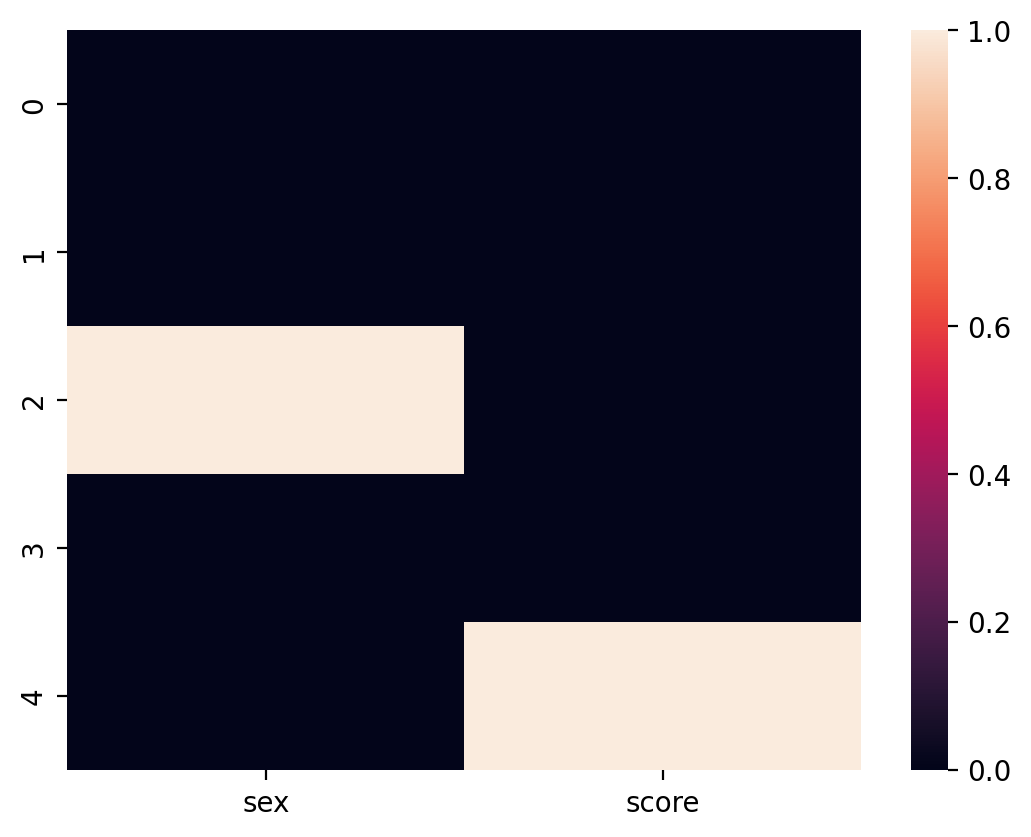

In [140]:
import seaborn as sns

sns.heatmap(df.isnull())

<Axes: >

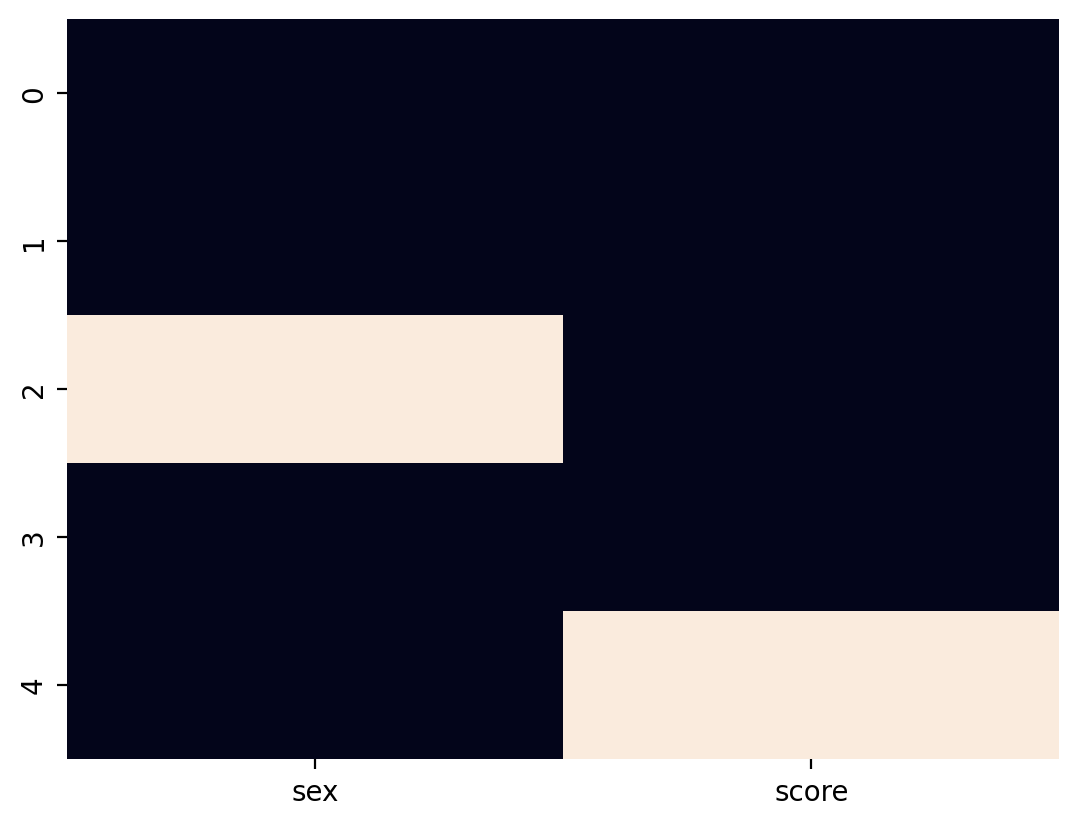

In [141]:
sns.heatmap(df.isnull(), cbar=False)


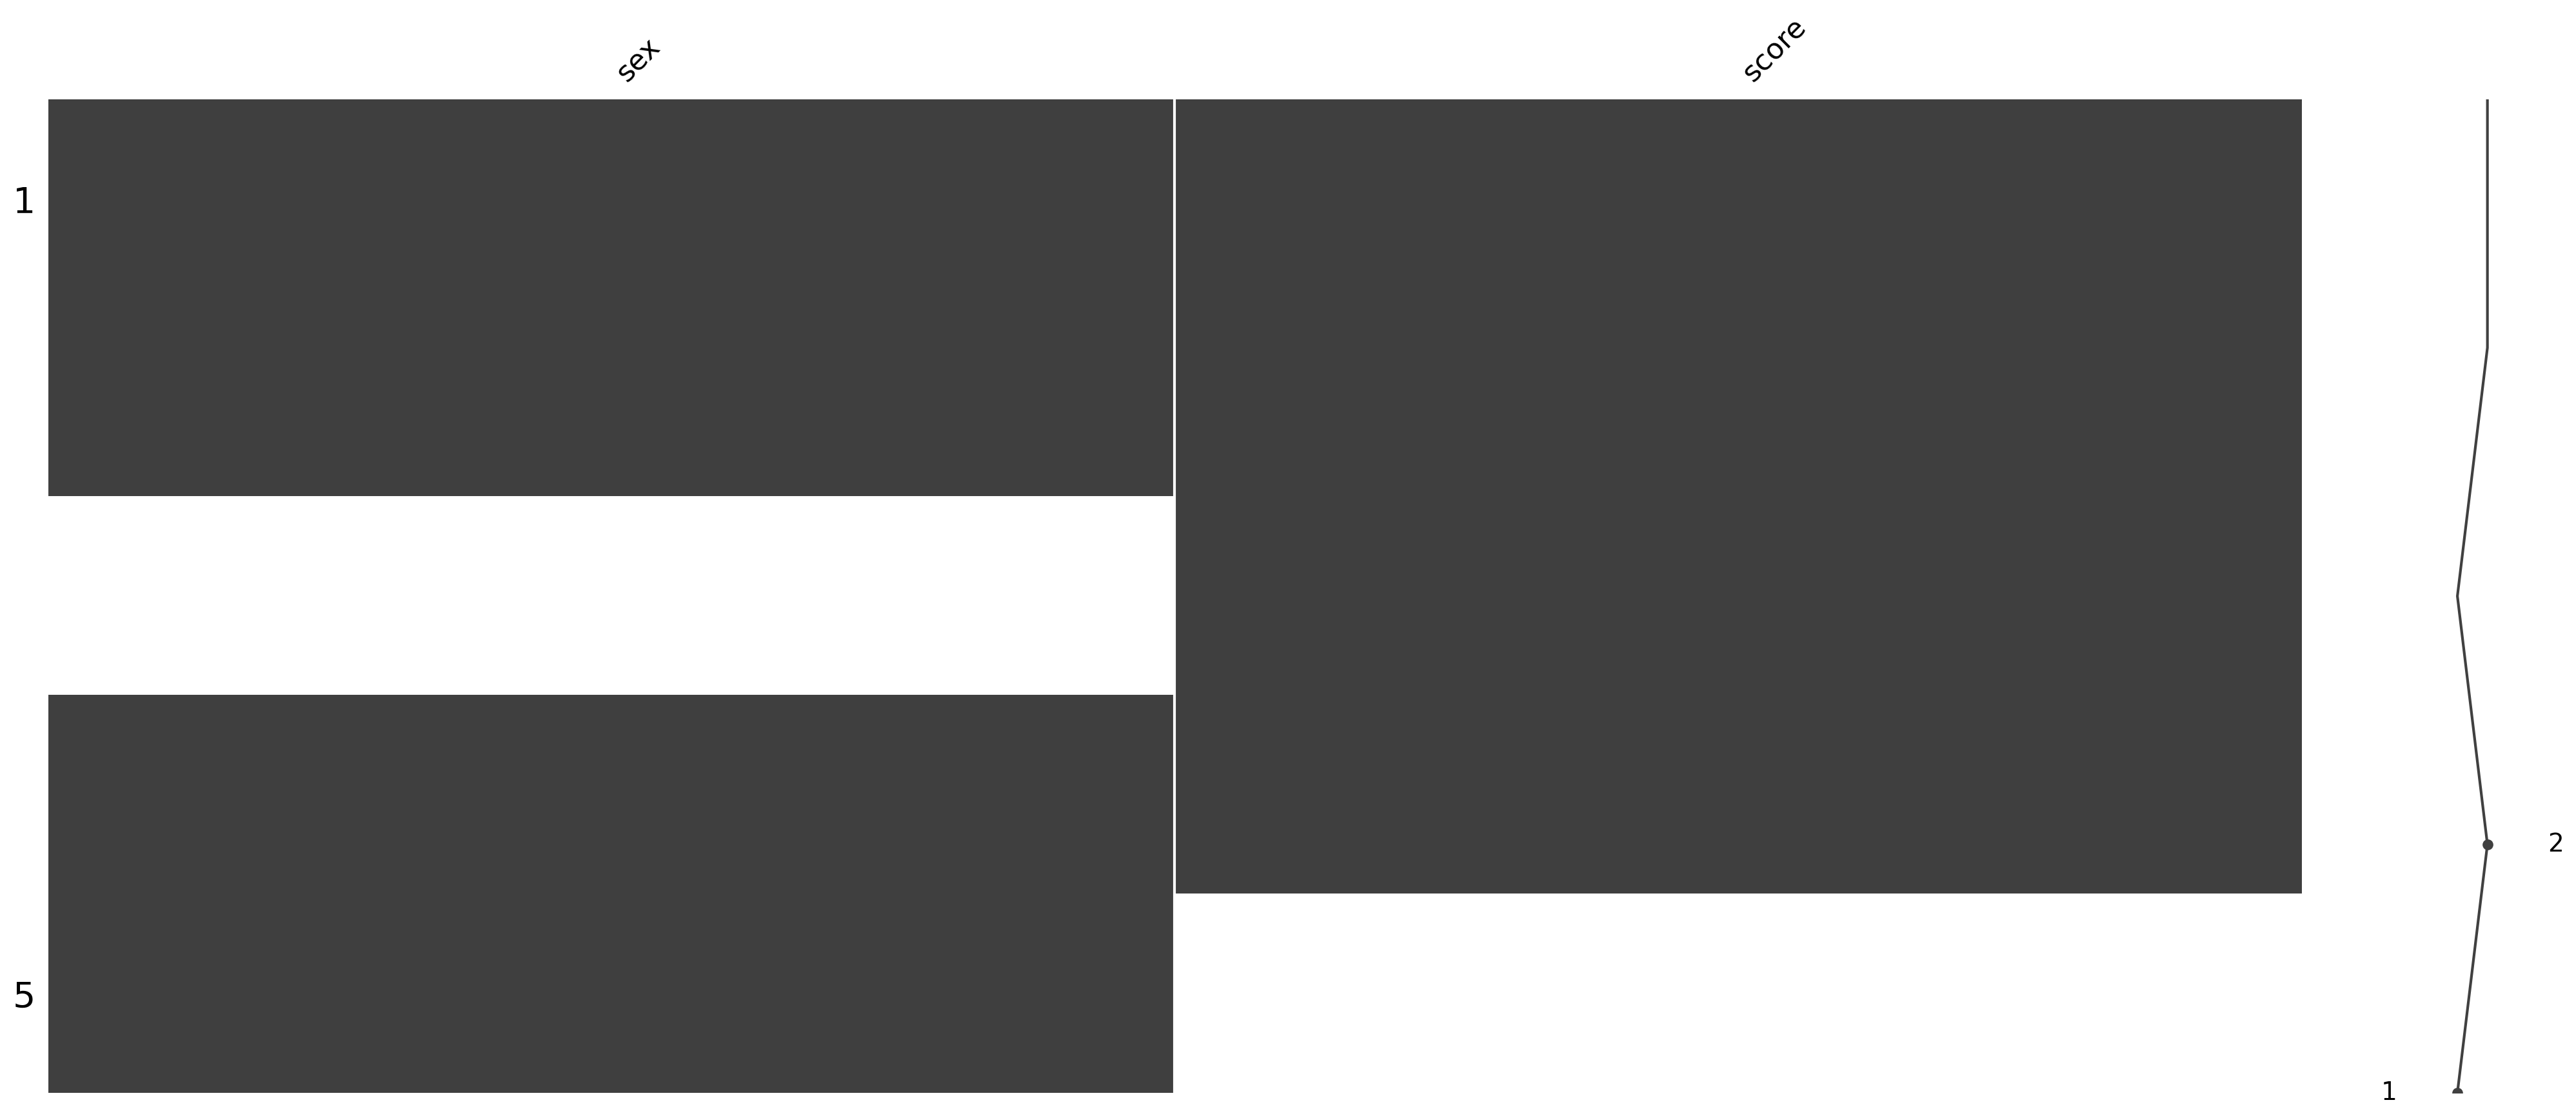

In [142]:
import missingno as msno
msno.matrix(df);

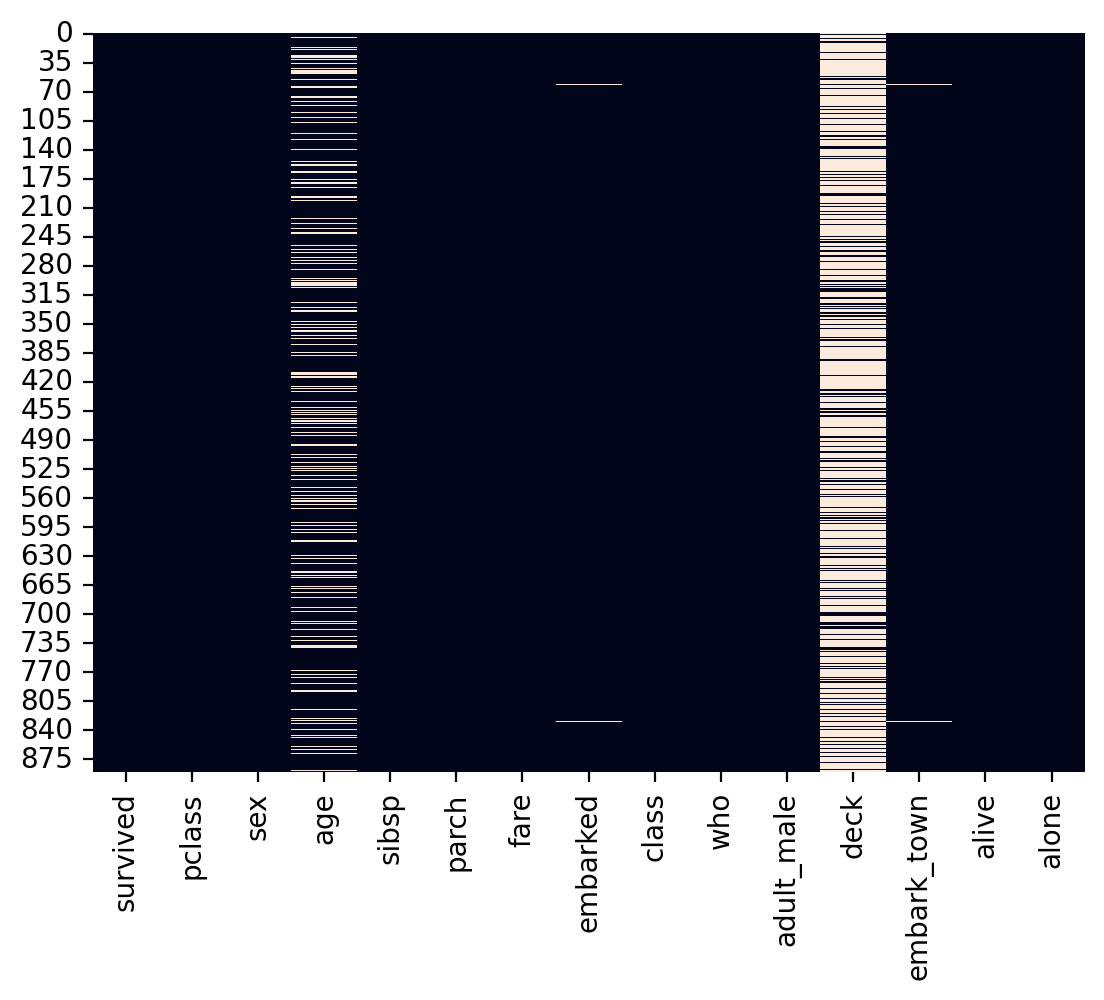

In [143]:
tdf = sns.load_dataset('titanic')
sns.heatmap(tdf.isnull(), cbar=False);

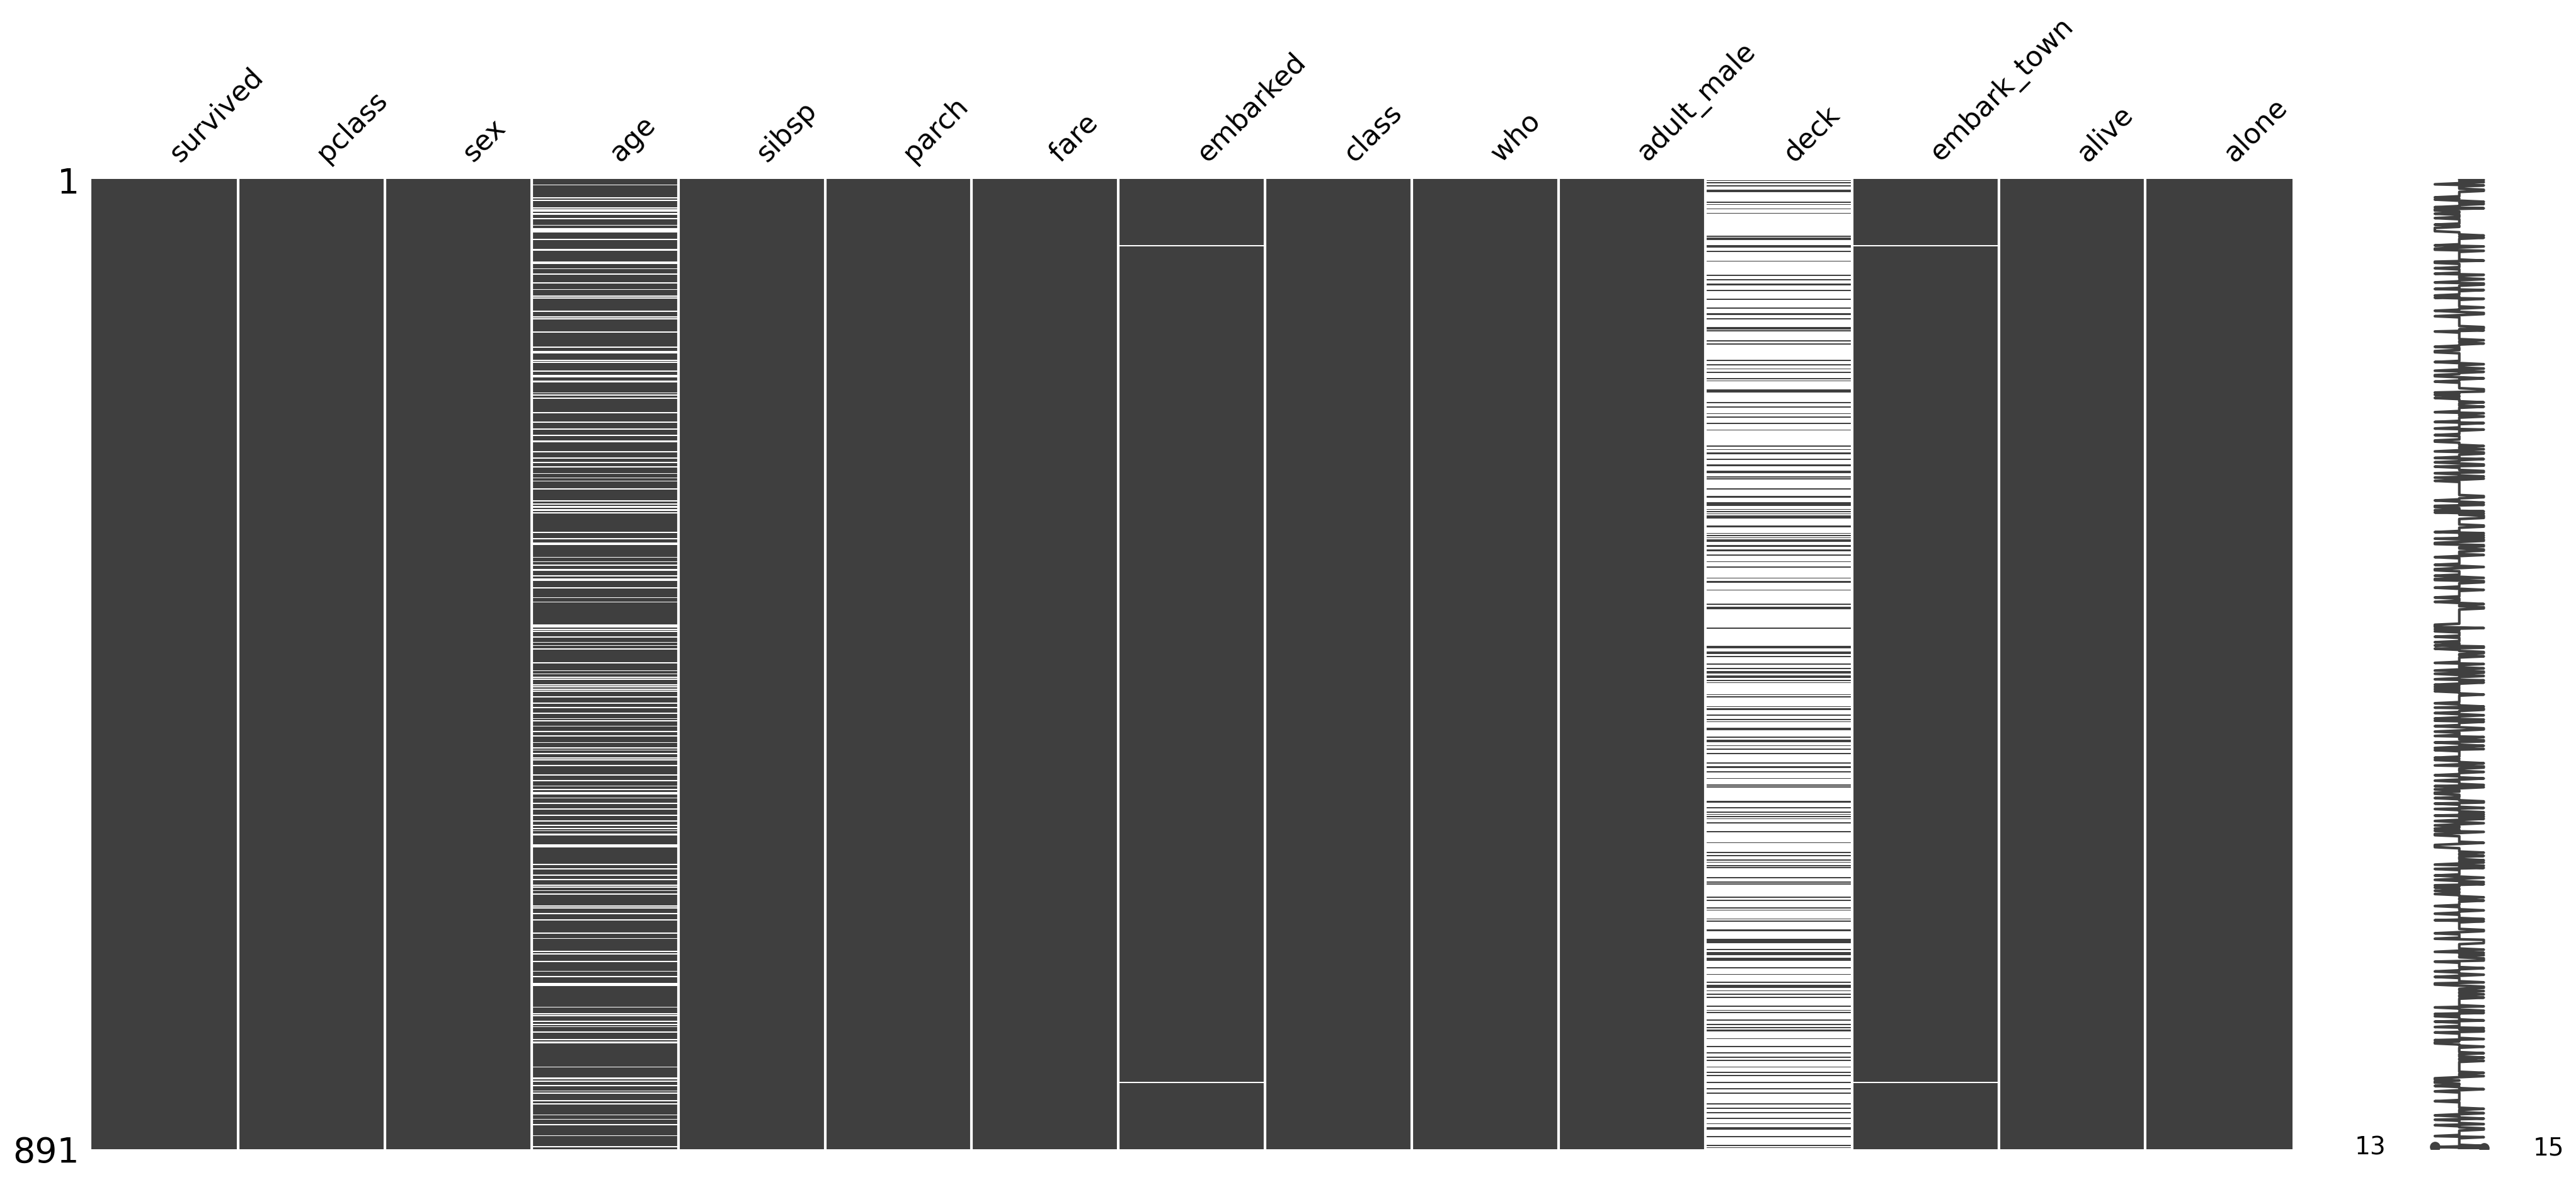

In [144]:
import missingno as msno
msno.matrix(tdf);

In [145]:
tdf2 = tdf.sample(20)
tdf2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
502,0,3,female,NaN,0,0,7.6292,Q,Third,woman,False,NaN,Queenstown,no,True
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
534,0,3,female,30.0,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True
403,0,3,male,28.0,1,0,15.8500,S,Third,man,True,NaN,Southampton,no,False
530,1,2,female,2.0,1,1,26.0000,S,Second,child,False,NaN,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
533,1,3,female,NaN,0,2,22.3583,C,Third,woman,False,NaN,Cherbourg,yes,False
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
357,0,2,female,38.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,no,True
735,0,3,male,28.5,0,0,16.1000,S,Third,man,True,NaN,Southampton,no,True


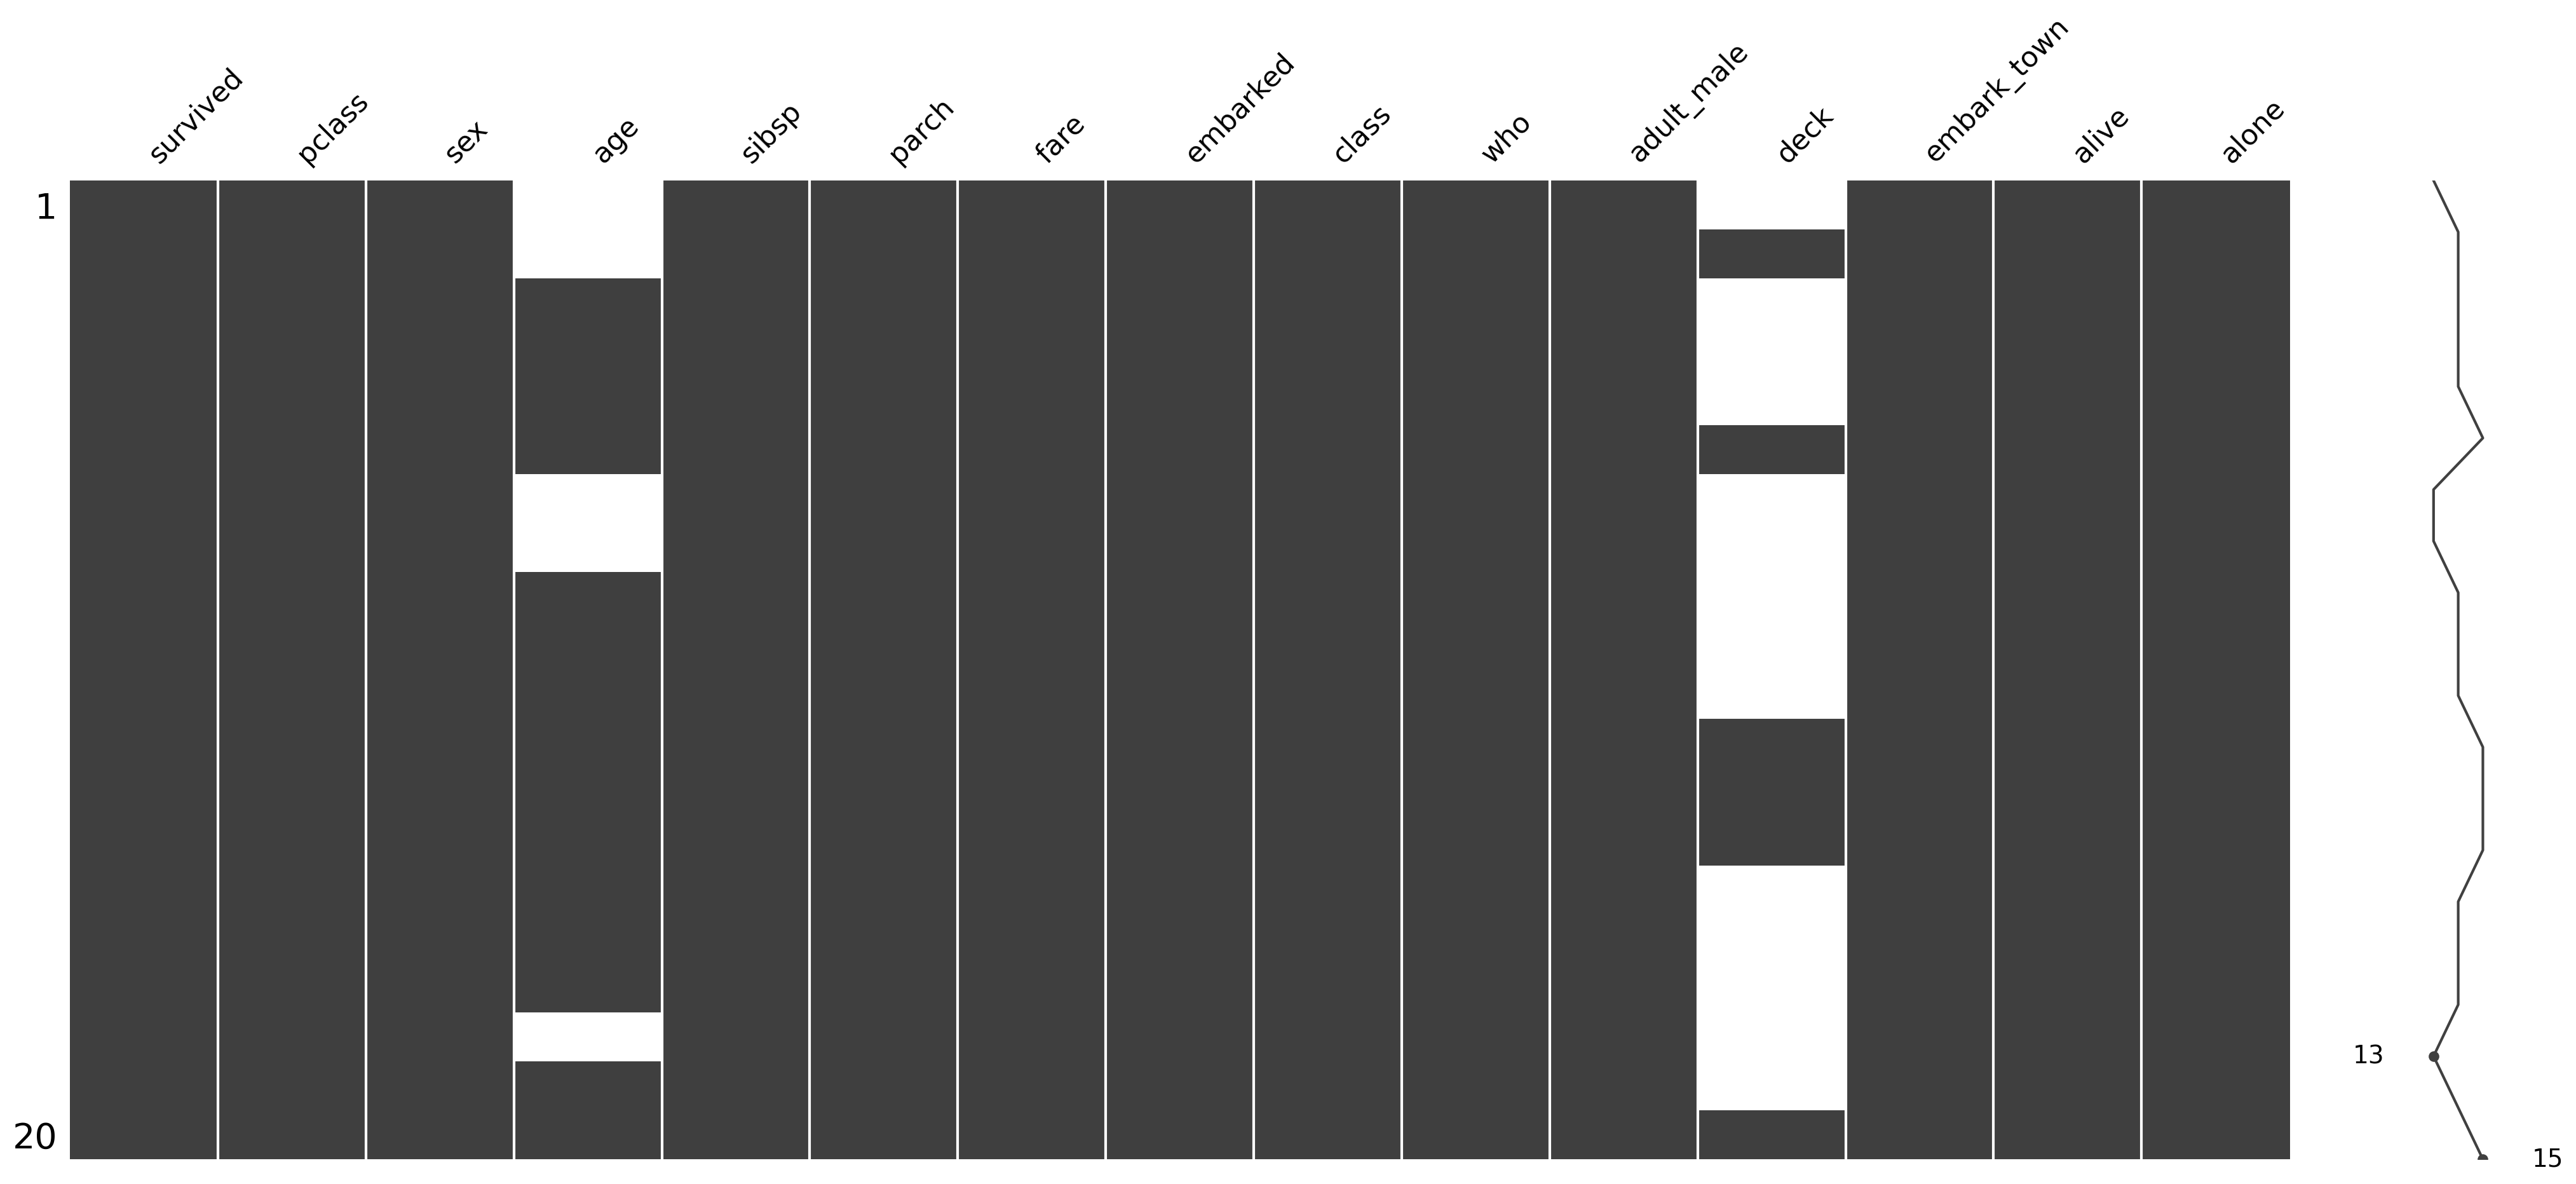

In [146]:
import missingno as msno
msno.matrix(tdf2);

In [147]:
# NaN이 1개인 행을 추출
tdf[tdf.isna().sum(axis=1) == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


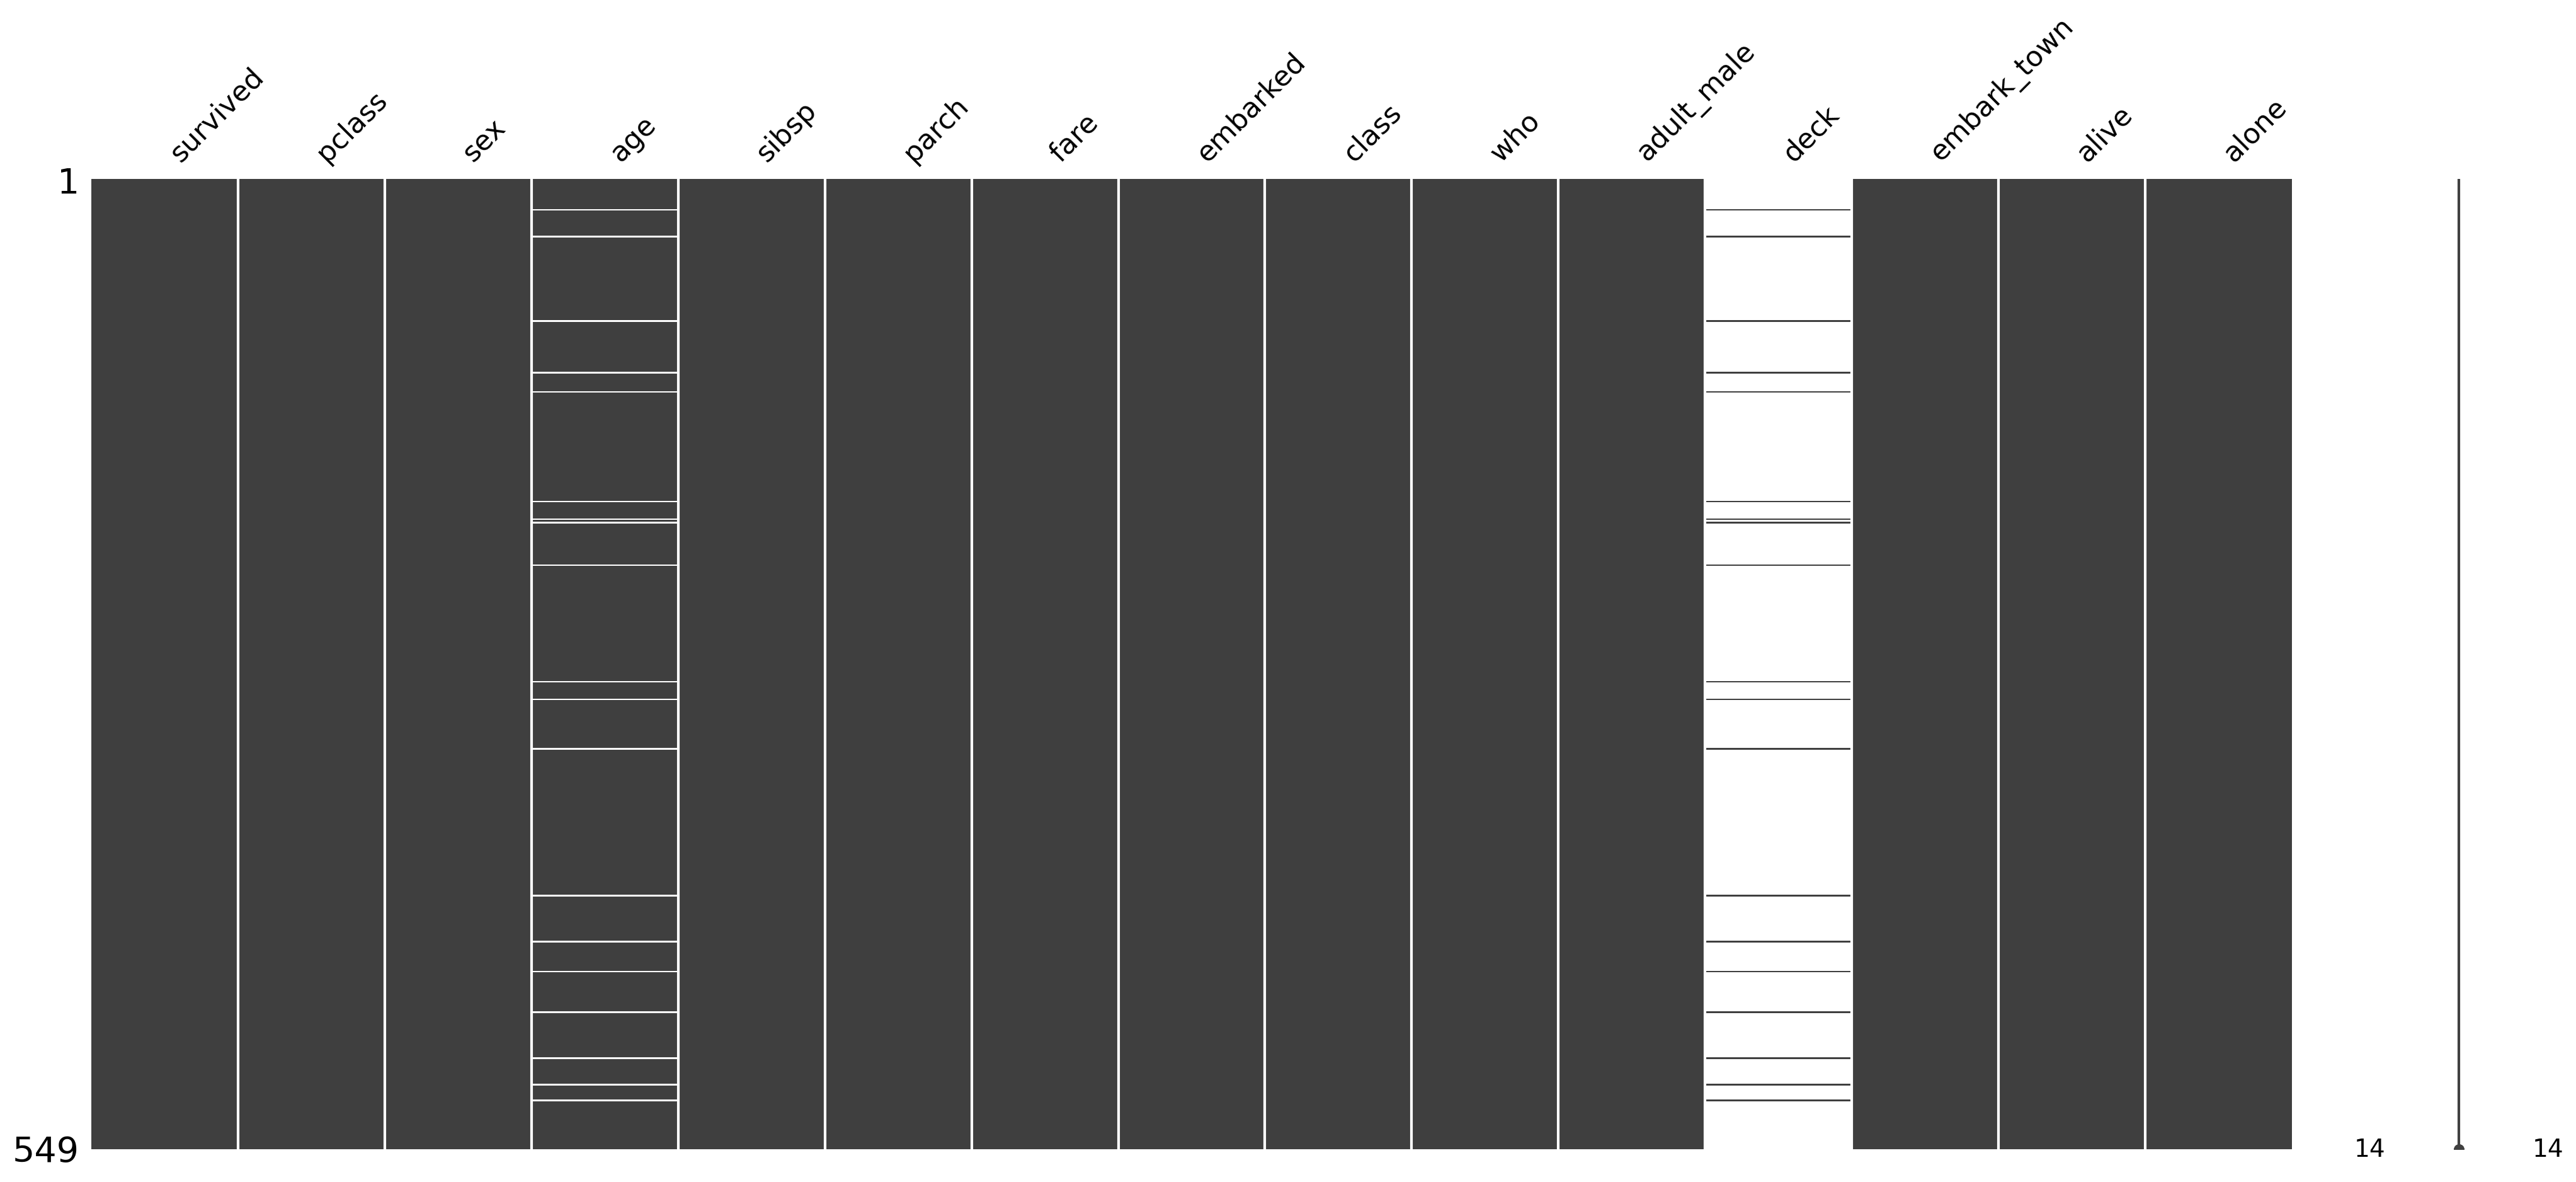

In [148]:
msno.matrix( tdf[tdf.isna().sum(axis=1) == 1] );


In [149]:
# 열 embarked가 NaN인 행 추출
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [150]:
# 두 열, age, deck이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [151]:
# 세 개 열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [152]:
# 최소한 1개의 NaN에 있는 행 추출
tdf[tdf.isna( ).any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


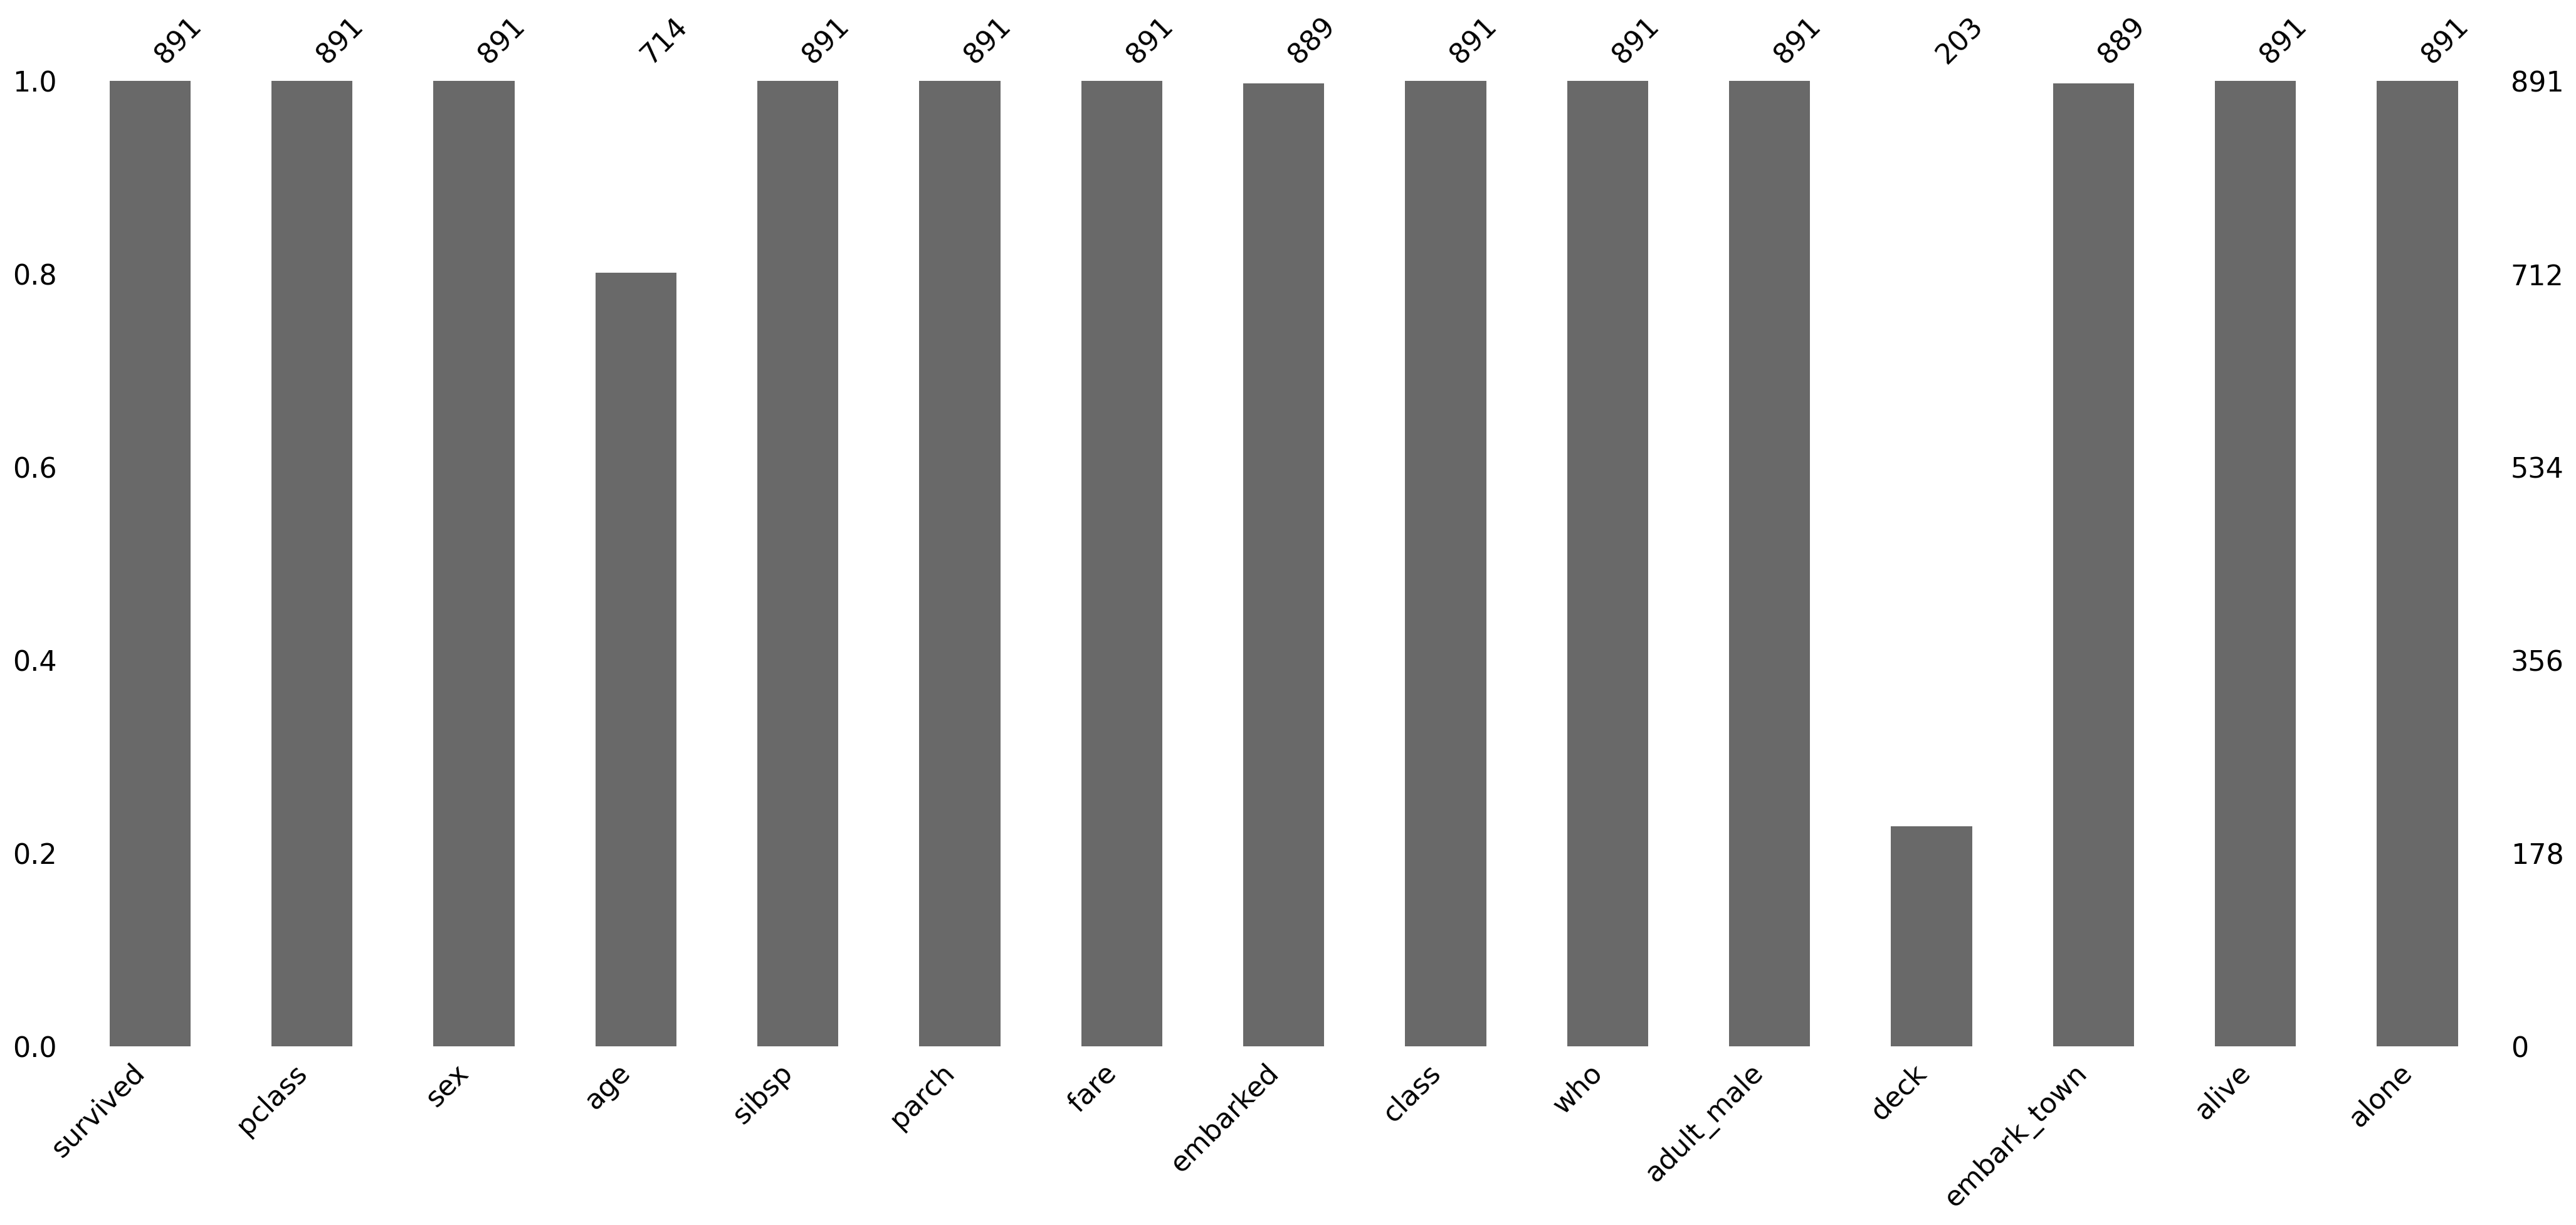

In [153]:
msno.bar(tdf);


<Axes: >

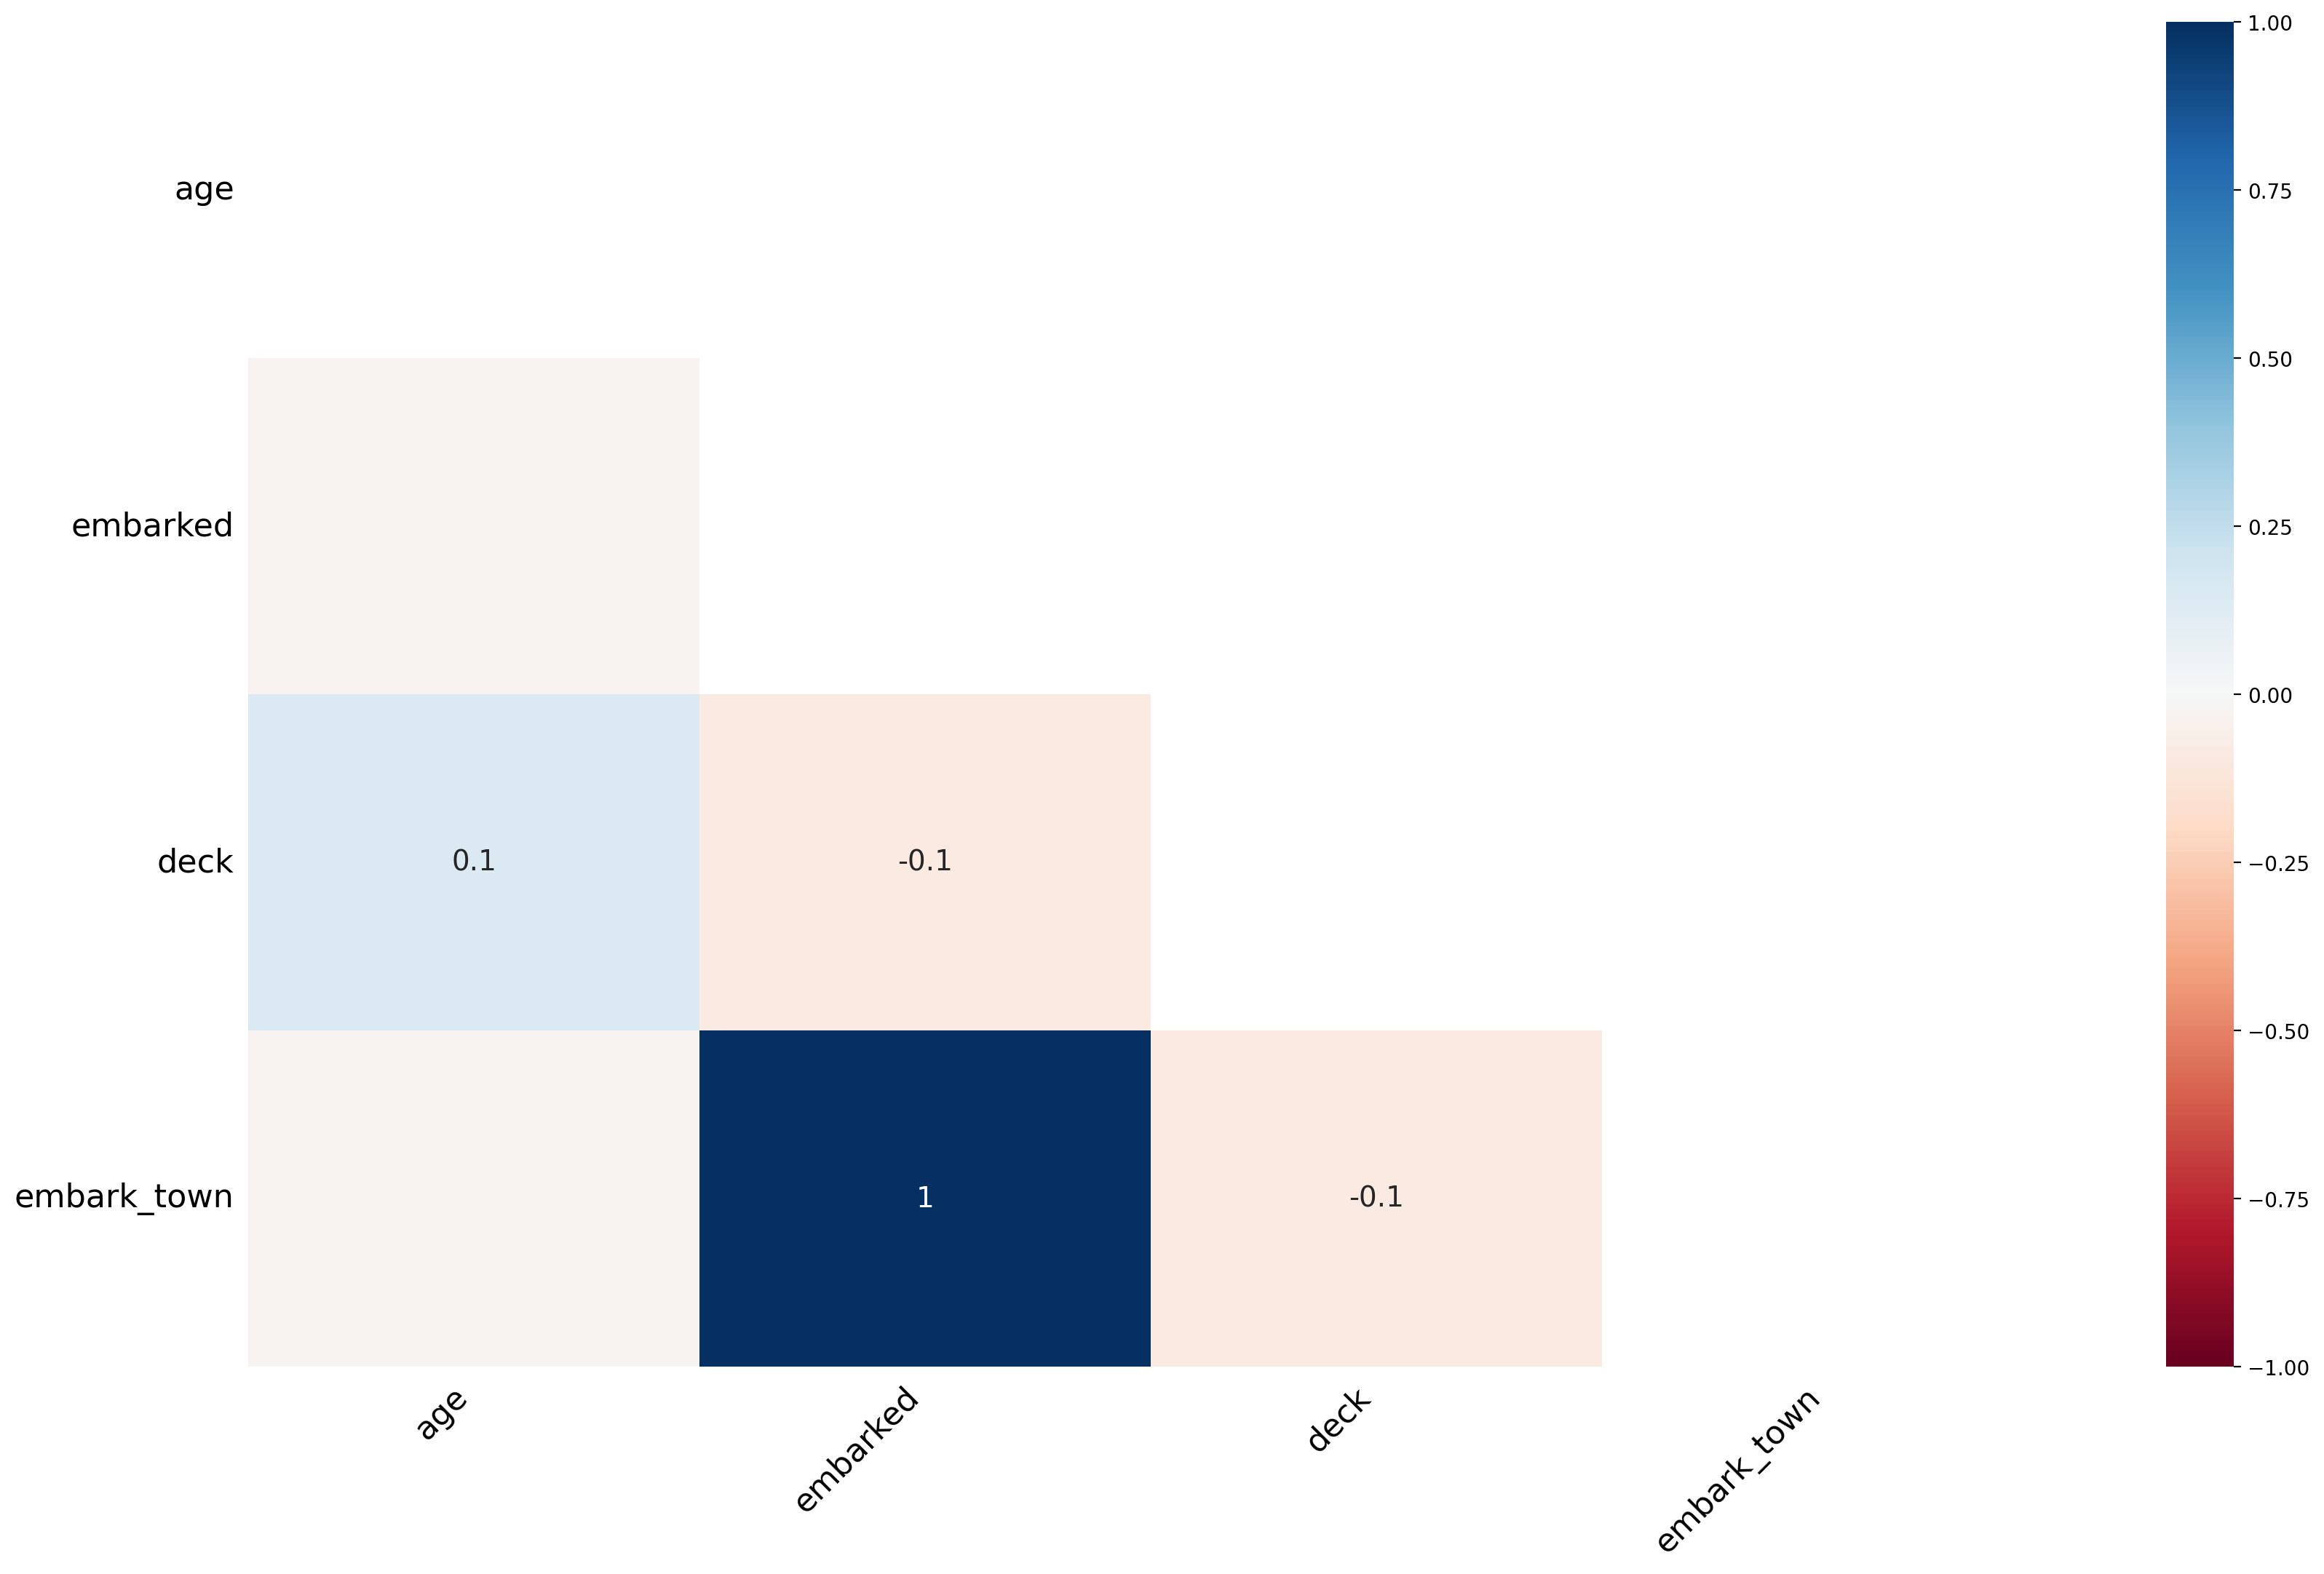

In [154]:
msno.heatmap(tdf)


##결측치 제거하기
결측치 있는 행 제거하기
subset : 열 레이블 또는 레이블 시퀀스(선택 사항)
예를 들어 행을 드롭하는 경우, 다른 축인 열을 지정하면 그열에 null이 있는 행을 제거

In [155]:
df


,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [156]:
df.dropna(subset = ['score'])  # score 결측치 제거


,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [157]:
df_nomiss = df.dropna(subset = ['score'])  # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [158]:
# 행 2에 NaN이 있으면 열을 제거
df.dropna(subset = [2], axis = 1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [159]:
# 행 3에 NaN이 있으면 열을 제거
df.dropna(subset = [3], axis = 1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [160]:
df.dropna() # 하나라도 NaN가 있는 행은 제거

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#여러 변수에 결측치 없는 데이터 추출하기


In [161]:
# score, sex에서 결측값이 있는 행 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


결측치가 하나라도 있으면 제거하기


In [162]:
df_nomiss2 = df.dropna()  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


(알아 두면 좋아요) 결측치 제거하지 않고 분석하기

In [163]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [164]:
df['score'].mean() # 결측값은 제거(무시)하고 계산


np.float64(4.0)

In [165]:
df['score'].sum() # 결측값은 제거(무시)하고 계산


np.float64(16.0)

In [166]:
# 결측값은 제거(무시)하고 계산
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


pandas 문서: df.dropna()

In [167]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.NaN],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

In [168]:
df.isna()


,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [169]:
df.dropna()


,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [170]:
df.dropna(axis='columns') # 아무것도 없는 빈 데이터프레임


""
0
1
2
3
4


In [171]:
# 모든 값이 NaN인 경우, 행 제거
df.dropna(how='all')

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [172]:
# 하나라도 NaN인 경우, 행 제거
df.dropna(how='any')

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


인자 thresh
thresh: int, optional
유효(non-NA) 값이 지정한 것보다 이상이어여 남김(잔류). how와 결합할 수 없습니다.
Require that many non-NA values. Cannot be combined with how

In [ ]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=2) # 적어도 na가 아닌 값이 2개 이상인 행을 잔류

In [ ]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=1) # 적어도 na가 아닌 값이 2개 이상인 행을 잔류

In [ ]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=3) # 유효 값이 3개 이상인 행을 잔류

In [ ]:
df.dropna(thresh=1, how='any') # 오류, 인자 thresh, how 동시 사용 불가


In [ ]:
df.dropna(subset=['name', 'toy']) # 지정한 열에서 na인 행을 제거


In [ ]:
df.dropna(subset=['toy'])


In [ ]:
df.dropna(subset='toy')


빈 데이터프레임 확인 방법 df.empty

In [ ]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'])
df1

In [ ]:
df1.empty


In [ ]:
df1 = pd.DataFrame(columns=['col1','col2','col3'])
df1

In [ ]:
df1.empty

In [ ]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'],
                   columns=['col1', 'col2', 'col3'])
df1

In [ ]:
df1.empty


In [ ]:
df1 = pd.DataFrame(np.nan,
                  index = ['row1', 'row2', 'row3'],
                  columns=['col1','col2','col3'])
df1

In [ ]:
df1.empty


In [ ]:
df1 = pd.DataFrame(2,
                  index = ['row1', 'row2', 'row3'],
                  columns=['col1','col2','col3'])
df1

 결측치 대체하기
평균값으로 결측치 대체하기

In [ ]:
!git clone https://github.com/ai7dnn/data.git


In [ ]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

In [ ]:
exam.loc[[2, 7, 14], ['math']]


In [ ]:
exam.loc[[2, 7, 14], 'math']


In [ ]:
round(exam['math'].mean(), 2)


In [ ]:
import numpy as np
np.set_printoptions(precision=1)
np.array([np.pi])

인자 suppress
True이면 항상 부동 소수점 표기법을 사용하여 부동 소수점 숫자를 출력하며, 이 경우 현재 정밀도에서 0과 같은 숫자는 0으로 출력됩니다.
False이면 가장 작은 수의 절대값이 < 1e-4이거나 최대값과 최소값의 비율이 > 1e3일 때 과학적 표기법이 사용됩니다.
기본값은 False입니다.

In [175]:
np.set_printoptions(precision=1, suppress = False)
np.array([0.0000001])

array([1.e-07])

In [176]:
np.set_printoptions(precision=1, suppress = True)
np.array([0.0000001])

array([0.])

In [177]:
round(np.pi, 2)


3.14

In [178]:
exam['math'] = exam['math'].fillna(100)  # math가 NaN이면 55로 대체
exam                                    # 출력

NameError: name 'exam' is not defined

In [174]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

FileNotFoundError: [Errno 2] No such file or directory: 'data/exam.csv'

In [173]:
pd.set_option('display.precision', 2)
exam['math'] = exam['math'].fillna(exam['math'].mean())  # math가 NaN이면 55로 대체
exam                                    # 출력

NameError: name 'exam' is not defined


07-2 이상한 데이터를 찾아라! - 이상치 정제하기
이상치 제거하기 - 존재할 수 없는 값

In [ ]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

이상치 확인하기


In [ ]:
df['sex'].value_counts()


In [ ]:
df['sex'].value_counts().sort_index()


In [ ]:
df['score'].value_counts()


In [ ]:
df['score'].value_counts().sort_index()


결측 처리하기


In [ ]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

In [ ]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

In [ ]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

(알아 두면 좋아요) np.where()는 문자와 NaN을 함께 반환할 수 없습니다.

In [ ]:
df = pd.DataFrame([1])
df

In [ ]:
df = pd.DataFrame([1, 1, 2, 2])
df

In [ ]:
df = pd.DataFrame([[1, 1, 2, 2]])
df

In [ ]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

In [ ]:
df.isna()


In [ ]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자열 부여
df

In [ ]:
df.isna()


In [ ]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

In [ ]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

In [ ]:
df.isna()


In [ ]:
df2 = df.fillna(10)
df2

In [ ]:
df

In [ ]:
df2.info()


In [ ]:
type(df2.loc[2, 'x2'])



이상치 제거하기 - 극단적인 값
상자 그림으로 극단치 기준 정하기
1. 상자 그림 살펴보기

In [ ]:
!git clone https://github.com/ai7dnn/data


In [ ]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(10)

In [ ]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

2.극단치 기준값 구하기
(1) 1사분위수, 3사분위수 구하기

In [ ]:
s = pd.Series([1, 2, 3, 4, 5])


In [ ]:
s.quantile([.01, .25, .50, .75, 1])


In [ ]:
s.quantile(.50)


In [ ]:
s.quantile([.25, .5, .75, 1])


In [ ]:
s2 = pd.Series([1, 2, 4, 5])


In [ ]:
s2.quantile([.25, .5, .75, 1])


In [ ]:
pct25, pct50, pct75 = mpg['hwy'].quantile([.25, .5, .75])
pct25

In [ ]:
pct50, pct75


(2) IQR 구하기



In [ ]:
iqr = pct75 - pct25
iqr

In [ ]:
pct25 - 1.5 * iqr  # 하한


In [ ]:
pct75 + 1.5 * iqr  # 상한


describe() 메소드


In [ ]:
mpg['hwy'].describe()


In [ ]:
mpg['hwy'].describe()['25%']


결측값 확인


In [ ]:
mpg.isna().sum()


In [ ]:
import missingno as msno
msno.matrix(mpg);

3. 극단치를 결측 처리하기


In [ ]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

4. 결측치 제거하고 분석하기


In [ ]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

In [ ]:
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
dmpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

In [ ]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))


In [ ]:
len(mpg)


In [ ]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

In [ ]:
mpg[ mpg['hwy'] > 40.5 ]


In [ ]:
mpg.query( 'hwy > 40.5' )


정리하기

In [ ]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

보충학습


In [ ]:
mpg = pd.read_csv('data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

In [ ]:
def outlier_iqr(data, column):
    # lower, upper 글로벌 변수 선언하기
    global lower, upper

    # 4분위수 기준 지정하기
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

    # IQR 계산하기
    iqr = q75 - q25

    # outlier cutoff 계산하기
    cut_off = iqr * 1.5

    # lower와 upper bound 값 구하기
    lower, upper = q25 - cut_off, q75 + cut_off

    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기
    data1 = data[data[column] > upper][column]
    data2 = data[data[column] < lower][column]
    print(data1)
    print(data2)
    print('\nIQR:',iqr, 'lower bound:', lower, 'upper bound:', upper)

    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [ ]:
outlier_iqr(mpg, "hwy")


In [ ]:
#사분위수 구하기
q1 = mpg['hwy'].quantile(0.25)
q2 = mpg['hwy'].quantile(0.5)
q3 = mpg['hwy'].quantile(0.75)
q4 = mpg['hwy'].quantile(1)

# IQR값 구하기
iqr = q3-q1

#이상치값 구하기
mpg[(mpg['hwy'] < q1-1.5 * iqr) | (mpg['hwy'] > q3+1.5 * iqr)]